# HARVEST

## EDA

In [7]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as snb

In [8]:
vinos = pd.read_csv(r"C:\Users\carra\Dropbox\PC\Desktop\Harvest\Harvest\calidad_de_vino.csv")
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   botella_id               6497 non-null   int64  
 1   acidez fija              6497 non-null   float64
 2   acidez volatil           6497 non-null   float64
 3   acido citrico            6497 non-null   float64
 4   azucar residual          6497 non-null   float64
 5   cloruros                 6497 non-null   float64
 6   dioxido de azufre libre  6497 non-null   float64
 7   dioxido de azufre total  6497 non-null   float64
 8   densidad                 6497 non-null   float64
 9   pH                       6497 non-null   float64
 10  sulfatos                 6497 non-null   float64
 11  alcohol                  6497 non-null   float64
 12  color                    6497 non-null   object 
 13  calidad                  6497 non-null   int64  
dtypes: float64(11), int64(2)

In [9]:
vinos.head()

,botella_id,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,color,calidad
0,0,9.5,0.56,0.33,2.4,0.089,35.0,67.0,0.99720,3.28,0.73,11.8,rojo,7
1,1,6.6,0.24,0.28,1.8,0.028,39.0,132.0,0.99182,3.34,0.46,11.4,blanco,5
2,2,9.4,0.59,0.14,2.0,0.084,25.0,48.0,0.99810,3.14,0.56,9.7,rojo,5
3,3,6.1,0.32,0.33,10.7,0.036,27.0,98.0,0.99521,3.34,0.52,10.2,blanco,6
4,4,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.1,blanco,6


In [19]:
#Elimino los espacios de lo nombres de la columnas, para poder trabajar mejor.

vinos = vinos.rename(columns=lambda x: x.strip().replace(" ", "_"))

In [16]:
vinos['calidad'].unique()

array([7, 5, 6, 3, 4, 8, 9], dtype=int64)

In [17]:
vinos['color'].unique()

array(['rojo', 'blanco'], dtype=object)

In [20]:
# Creo una referencia numérica para el color de vino
# Defin un diccionario que mapee los valores de string a sus correspondientes números

replace = {
    'rojo': 1,
    'blanco': 2
}

# Utilizo el método 'replace' para hacer el reemplazo en la columna 'color'

vinos['color'] = vinos['color'].replace(replace)

vinos.head()

,botella_id,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,color,calidad
0,0,9.5,0.56,0.33,2.4,0.089,35.0,67.0,0.99720,3.28,0.73,11.8,1,7
1,1,6.6,0.24,0.28,1.8,0.028,39.0,132.0,0.99182,3.34,0.46,11.4,2,5
2,2,9.4,0.59,0.14,2.0,0.084,25.0,48.0,0.99810,3.14,0.56,9.7,1,5
3,3,6.1,0.32,0.33,10.7,0.036,27.0,98.0,0.99521,3.34,0.52,10.2,2,6
4,4,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.1,2,6


### Relación acidez-color

In [21]:
correlacion = vinos['acidez_fija'].corr(vinos['color'])

print("La correlación entre columna1 y columna2 es:", correlacion)

La correlación entre columna1 y columna2 es: -0.4867398320680519


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

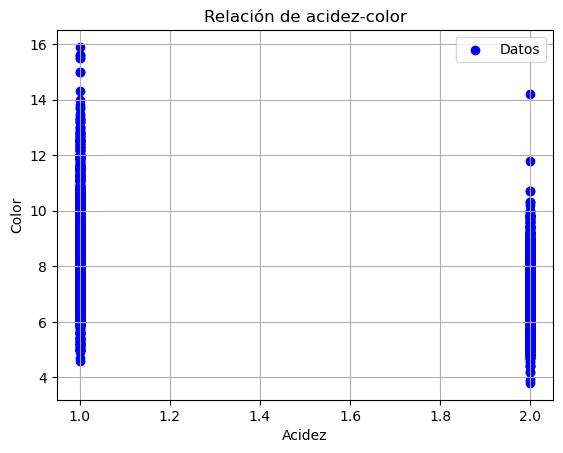

In [29]:
# Graficar los datos en un gráfico de dispersión
plt.scatter(vinos['color'], vinos['acidez_fija'], color='blue', label='Datos')

# Agregar una línea para mostrar la correlación entre las dos columnas
#plt.plot(vinos['acidez_fija'], correlacion * vinos['color'], color='red', label=f'Correlación: {correlacion:.2f}')

# Configuraciones del gráfico
plt.xlabel('Acidez')
plt.ylabel('Color')
plt.title('Relación de acidez-color')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()